In [18]:
import pandas as pd

In [25]:
df = pd.read_csv('Clean_Dataset.csv')

In [26]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Preprocessing

In [27]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 0 if x == 'Economy' else 1)
df.stops = pd.factorize(df.stops)[0]

In [28]:
df = df.join(pd.get_dummies(df.airline, prefix='airline').astype(int)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source').astype(int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest').astype(int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure').astype(int)).drop('departure_time', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival').astype(int)).drop('arrival_time', axis=1)

In [29]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300151,1,1,10.00,49,81585,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Training Regression Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X,y = df.drop('price', axis=1), df.price

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [34]:
reg.score(X_test, y_test)

0.9850242162497018

In [37]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9850242162497018
MAE: 1084.9519930540637
MSE: 7736596.818196049
RMSE: 2781.4738571836424


Text(0.5, 1.0, 'Prediction VS Actual Price')

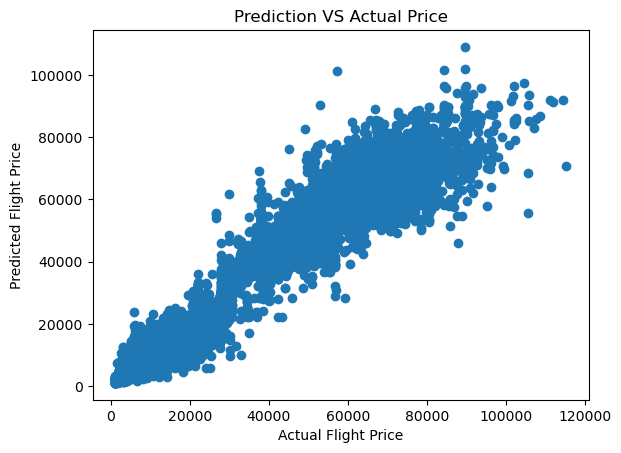

In [38]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction VS Actual Price')

In [39]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key= lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.8801912794994864),
 ('duration', 0.057006939846877776),
 ('days_left', 0.018498568934166997),
 ('airline_Air_India', 0.005227950063638952),
 ('airline_Vistara', 0.004911109314545622),
 ('source_Delhi', 0.0038783683635697664),
 ('dest_Delhi', 0.0031939848169769357),
 ('source_Mumbai', 0.0021572274674147513),
 ('dest_Mumbai', 0.0019521992184737622),
 ('source_Kolkata', 0.001829284280903049),
 ('dest_Kolkata', 0.0017730780735232677),
 ('stops', 0.001753923112215375),
 ('arrival_Evening', 0.0016132654271919665),
 ('dest_Hyderabad', 0.0015453332299008365),
 ('source_Hyderabad', 0.0013083086780641543),
 ('dest_Bangalore', 0.001297404179153232),
 ('arrival_Night', 0.0011547425443039687),
 ('departure_Evening', 0.001109152418957917),
 ('source_Bangalore', 0.0010947474943616366),
 ('arrival_Afternoon', 0.0010205664162075564),
 ('source_Chennai', 0.0009855821610250867),
 ('dest_Chennai', 0.0008839600677778637),
 ('departure_Morning', 0.0008750964000294122),
 ('departure_Afternoon', 

<BarContainer object of 10 artists>

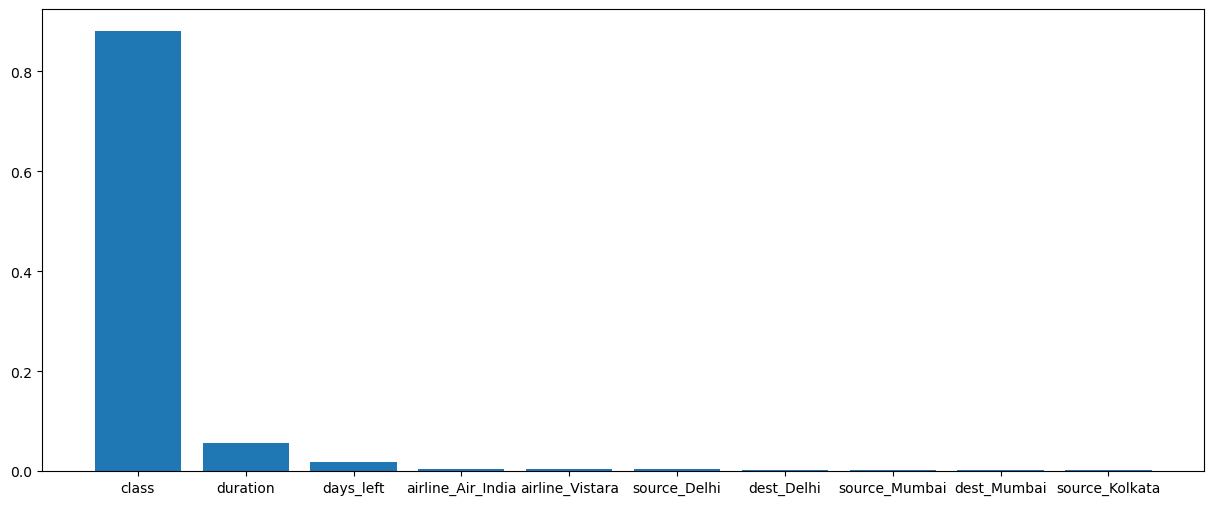

In [41]:
plt.figure(figsize=(15,6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])